In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\LENOVO\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv("Recruitment.csv")  #Load the data: Read the CSV file using pandas’ read_csv function.
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
df.shape


(446, 4)

In [4]:
df.info() #Understand the basic information about the data like the number of rows, columns, column names, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


#Data cleaning

#Handle Missing Values: The recruiting_source column seems to have some missing values. We’ll replace these with the string ‘Unknown’ using the fillna function.

In [5]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64


In [6]:
df['recruiting_source'].fillna('Unknown', inplace=True)  # Handle missing values by filling with 'Unknown'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\2561067289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recruiting_source'].fillna('Unknown', inplace=True)  # Handle missing values by filling with 'Unknown'


Data Grouping and Aggregation: We’ll group the data by recruiting_source and calculate the mean of performance_rating, sales_quota_pct, and attrition for each group using the groupby and agg functions.

In [7]:
# Check again for missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64


In [8]:
# Group the data by 'recruiting_source' and calculate aggregated statistics
grouped_df = df.groupby('recruiting_source').agg({
    'performance_rating': 'mean',
    'sales_quota_pct': 'mean',
    'attrition': 'mean'
})

In [9]:
# Calculate attrition rate for each recruiting source
grouped_df['attrition_rate'] = grouped_df['attrition'] / df['attrition'].sum()

In [10]:
# Sort the grouped data by attrition rate in descending order
grouped_df = grouped_df.sort_values(by='attrition_rate', ascending=False)

In [11]:
# Display the grouped and aggregated data
print("\nGrouped and Aggregated Data:")
print(grouped_df)


Grouped and Aggregated Data:
                   performance_rating  sales_quota_pct  attrition  \
recruiting_source                                                   
Search Firm                  2.700000         0.886960   0.500000   
Referral                     2.844444         1.023198   0.333333   
Campus                       2.928571         0.908035   0.285714   
Applied Online               2.930769         1.058590   0.246154   
Unknown                      2.882927         1.168109   0.131707   

                   attrition_rate  
recruiting_source                  
Search Firm              0.005263  
Referral                 0.003509  
Campus                   0.003008  
Applied Online           0.002591  
Unknown                  0.001386  


In [12]:
df = pd.read_csv("Recruitment.csv")

# Handle missing values
df['recruiting_source'].fillna('Unknown', inplace=True)

# Calculate average sales numbers and attrition numbers grouped by recruiting source
grouped_df = df.groupby('recruiting_source').agg({
    'sales_quota_pct': 'mean',
    'attrition': 'mean'
})

print("Average Sales Numbers and Attrition Numbers Grouped by Recruiting Source:")
print(grouped_df)

Average Sales Numbers and Attrition Numbers Grouped by Recruiting Source:
                   sales_quota_pct  attrition
recruiting_source                            
Applied Online            1.058590   0.246154
Campus                    0.908035   0.285714
Referral                  1.023198   0.333333
Search Firm               0.886960   0.500000
Unknown                   1.168109   0.131707


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\748397819.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recruiting_source'].fillna('Unknown', inplace=True)


In [13]:
df.describe()     # summary statistics of the data.

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [14]:
df.isnull().sum()

attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64

#EDA

Visualize the distribution of performance_rating and sales_quota_pct: This will give us an idea about the range of values and how they are distributed.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


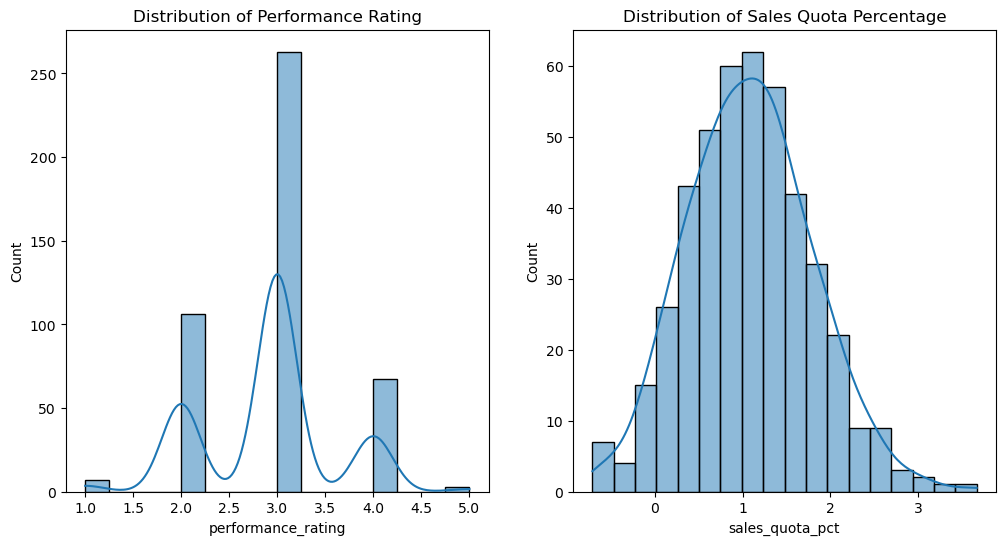

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['performance_rating'], kde=True)
plt.title('Distribution of Performance Rating')

plt.subplot(1, 2, 2)
sns.histplot(df['sales_quota_pct'], kde=True)
plt.title('Distribution of Sales Quota Percentage')
plt.show()

Distribution of Performance Rating: The left graph shows the distribution of performance ratings. It appears that the most common performance rating is around 3.0, with fewer employees receiving lower or higher ratings. This distribution is slightly skewed to the left, indicating that more employees tend to have a performance rating above 3.0 than below.

Distribution of Sales Quota Percentage: The right graph shows the distribution of sales quota percentages. This distribution appears to be approximately normal (bell-shaped), centered around a sales quota percentage of 1. This suggests that most employees achieve around 100% of their sales quota, with fewer employees achieving much lower or higher percentages.

Visualize the relationship between performance_rating and sales_quota_pct: This will help us understand if there’s a correlation between these two variables.

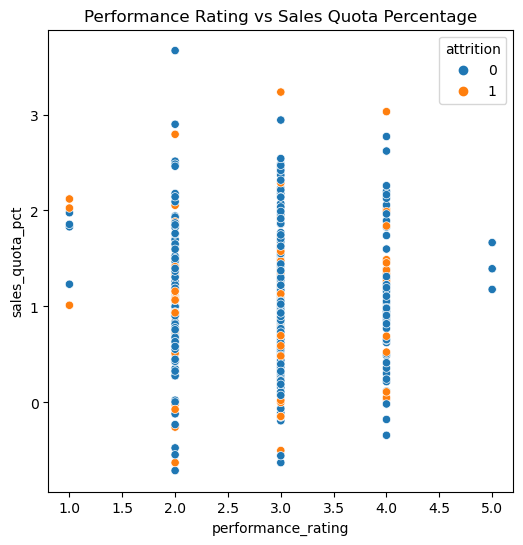

In [16]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='performance_rating', y='sales_quota_pct', hue='attrition', data=df)
plt.title('Performance Rating vs Sales Quota Percentage')
plt.show()

Visualize the average performance_rating and sales_quota_pct for each recruiting_source: This will help us understand which recruiting source brings in the best performing employees.

Text(0.5, 1.0, 'Average Performance Rating by Recruiting Source')

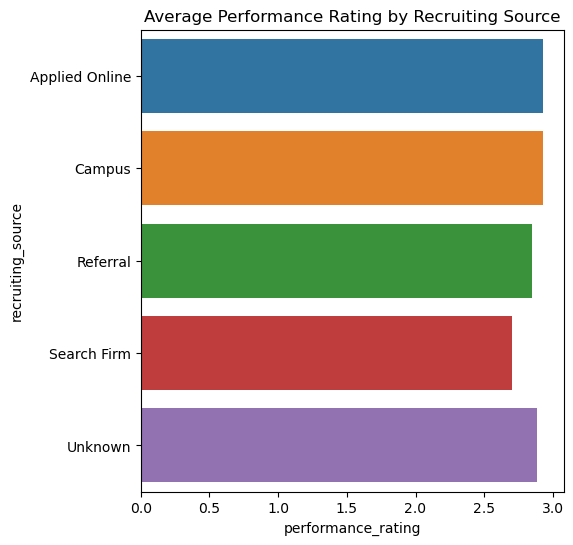

In [17]:
grouped_df = df.groupby('recruiting_source').agg({
    'performance_rating': 'mean',
    'sales_quota_pct': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='performance_rating', y='recruiting_source', data=grouped_df)
plt.title('Average Performance Rating by Recruiting Source')



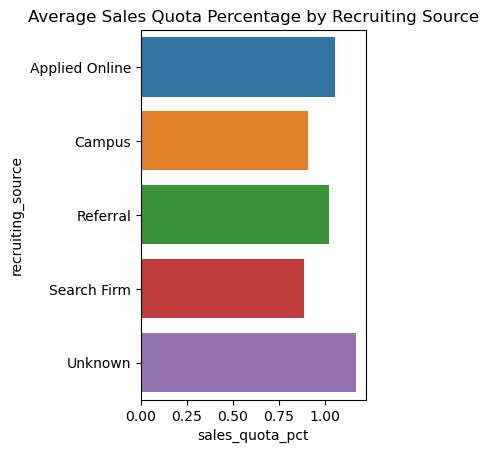

In [18]:
plt.subplot(1, 2, 2)
sns.barplot(x='sales_quota_pct', y='recruiting_source', data=grouped_df)
plt.title('Average Sales Quota Percentage by Recruiting Source')
plt.show()

Visualize the attrition rate for each recruiting_source: This will help us understand which recruiting source has the highest and lowest attrition rates

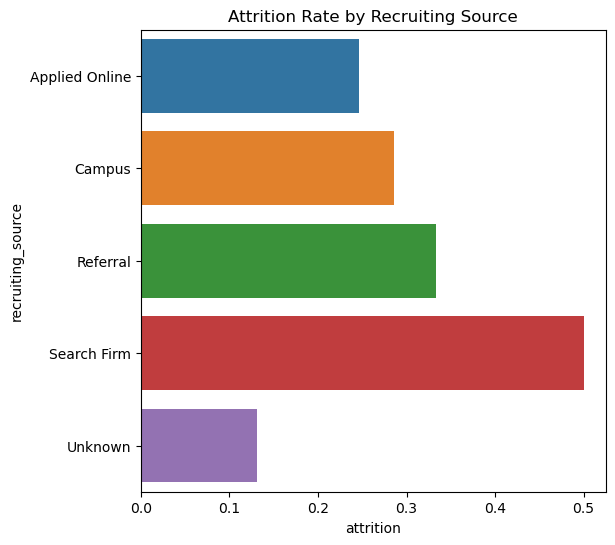

In [19]:
attrition_rate = df.groupby('recruiting_source')['attrition'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='attrition', y='recruiting_source', data=attrition_rate)
plt.title('Attrition Rate by Recruiting Source')
plt.show()

Handling Outliers

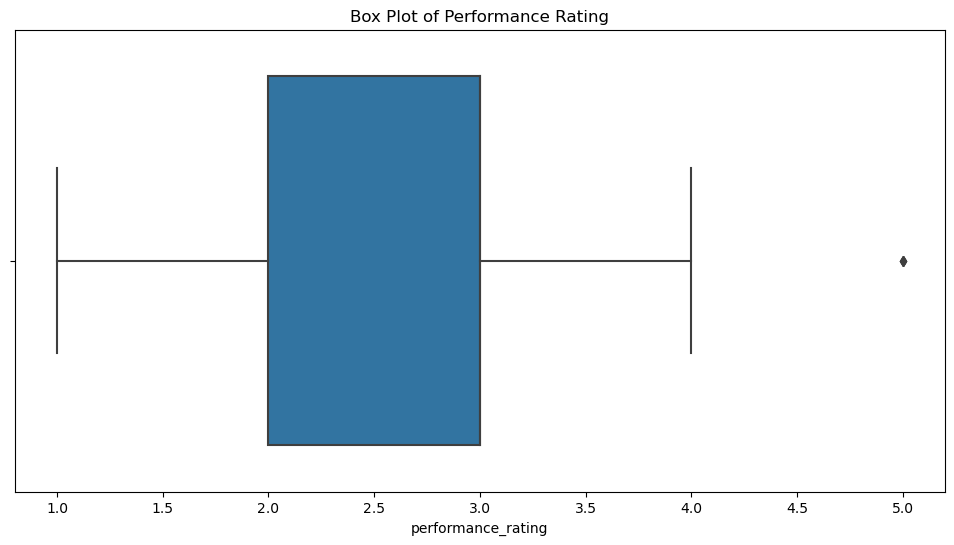

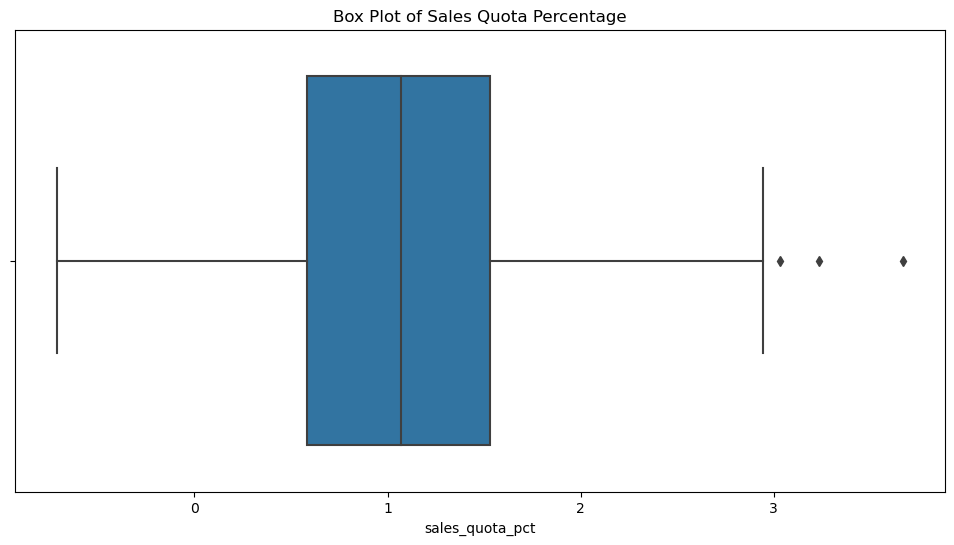

In [20]:
# Visualize performance metrics using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='performance_rating', data=df)
plt.title('Box Plot of Performance Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sales_quota_pct', data=df)
plt.title('Box Plot of Sales Quota Percentage')
plt.show()

In [21]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['performance_rating', 'sales_quota_pct']]))

# Define a threshold to identify an outlier
threshold = 3

# Get a boolean mask where True indicates it is an outlier
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers
df_without_outliers = df[~outliers]

In [22]:
print("Original DataFrame shape: ", df.shape)
print("DataFrame after outlier removal shape: ", df_without_outliers.shape)

Original DataFrame shape:  (446, 4)
DataFrame after outlier removal shape:  (441, 4)


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
df = pd.read_csv("Recruitment.csv")

# Handle missing values
df['recruiting_source'].fillna('Unknown', inplace=True)

# Convert categorical variables to numeric for correlation analysis and model building
df['recruiting_source'] = df['recruiting_source'].astype('category').cat.codes

# Correlation Analysis
print("Correlation Matrix:")
print(df.corr())

# Feature Importance
X = df.drop('attrition', axis=1)
y = df['attrition']

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
print("Feature Importances:")
print(feature_importances.sort_values('importance', ascending=False))

# Multicollinearity Check
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("Variance Inflation Factors:")
print(vif_data)

# Feature Engineering (Example: Interaction Feature)
# Create a new feature that represents the interaction between performance_rating and sales_quota_pct
df['perf_sales_interaction'] = df['performance_rating'] * df['sales_quota_pct']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\3664817611.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recruiting_source'].fillna('Unknown', inplace=True)


Correlation Matrix:
                    attrition  performance_rating  sales_quota_pct  \
attrition            1.000000           -0.023964        -0.044476   
performance_rating  -0.023964            1.000000        -0.011210   
sales_quota_pct     -0.044476           -0.011210         1.000000   
recruiting_source   -0.134259           -0.033647         0.088222   

                    recruiting_source  
attrition                   -0.134259  
performance_rating          -0.033647  
sales_quota_pct              0.088222  
recruiting_source            1.000000  
Feature Importances:
              feature  importance
1     sales_quota_pct    0.850263
2   recruiting_source    0.094750
0  performance_rating    0.054987
Variance Inflation Factors:
              feature       VIF
0  performance_rating  3.806219
1     sales_quota_pct  3.048154
2   recruiting_source  2.446448


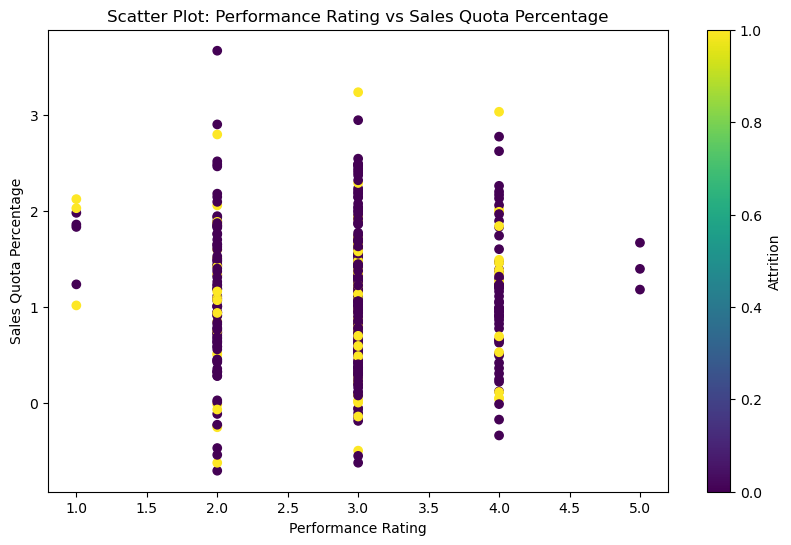

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['performance_rating'], df['sales_quota_pct'], c=df['attrition'], cmap='viridis')
plt.xlabel('Performance Rating')
plt.ylabel('Sales Quota Percentage')
plt.colorbar(label='Attrition')
plt.title('Scatter Plot: Performance Rating vs Sales Quota Percentage')
plt.show()


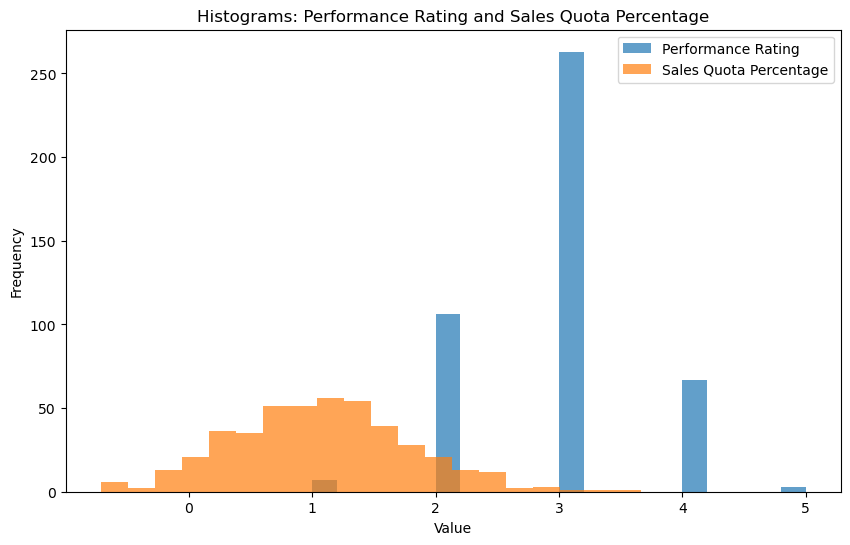

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['performance_rating'], bins=20, alpha=0.7, label='Performance Rating')
plt.hist(df['sales_quota_pct'], bins=20, alpha=0.7, label='Sales Quota Percentage')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histograms: Performance Rating and Sales Quota Percentage')
plt.show()

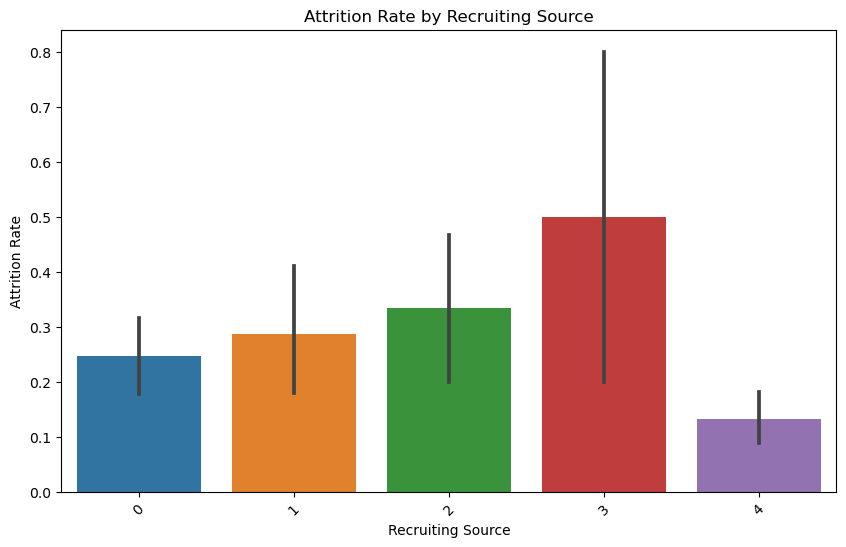

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='recruiting_source', y='attrition', data=df)
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Recruiting Source')
plt.xticks(rotation=45)
plt.show()

Missing Values Check:
Check for any remaining missing values in the dataset.

In [27]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
attrition                 0
performance_rating        0
sales_quota_pct           0
recruiting_source         0
perf_sales_interaction    0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\2746703970.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recruiting_source'].fillna('Unknown', inplace=True)


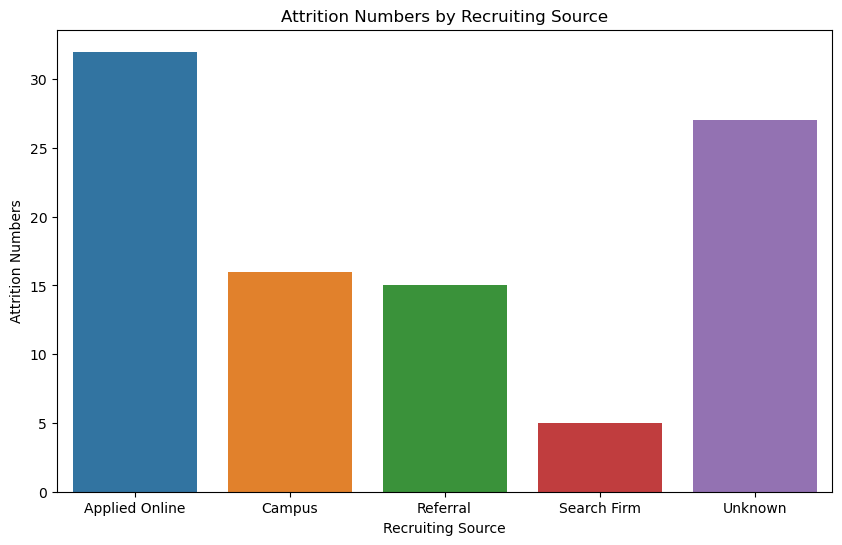

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("Recruitment.csv")

# Handle missing values
df['recruiting_source'].fillna('Unknown', inplace=True)

# Calculate attrition numbers grouped by recruiting source
attrition_counts = df.groupby('recruiting_source')['attrition'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title('Attrition Numbers by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition Numbers')
plt.show()


In [29]:
!pip install plotnine pandas

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\2263956535.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5596\2263956535.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


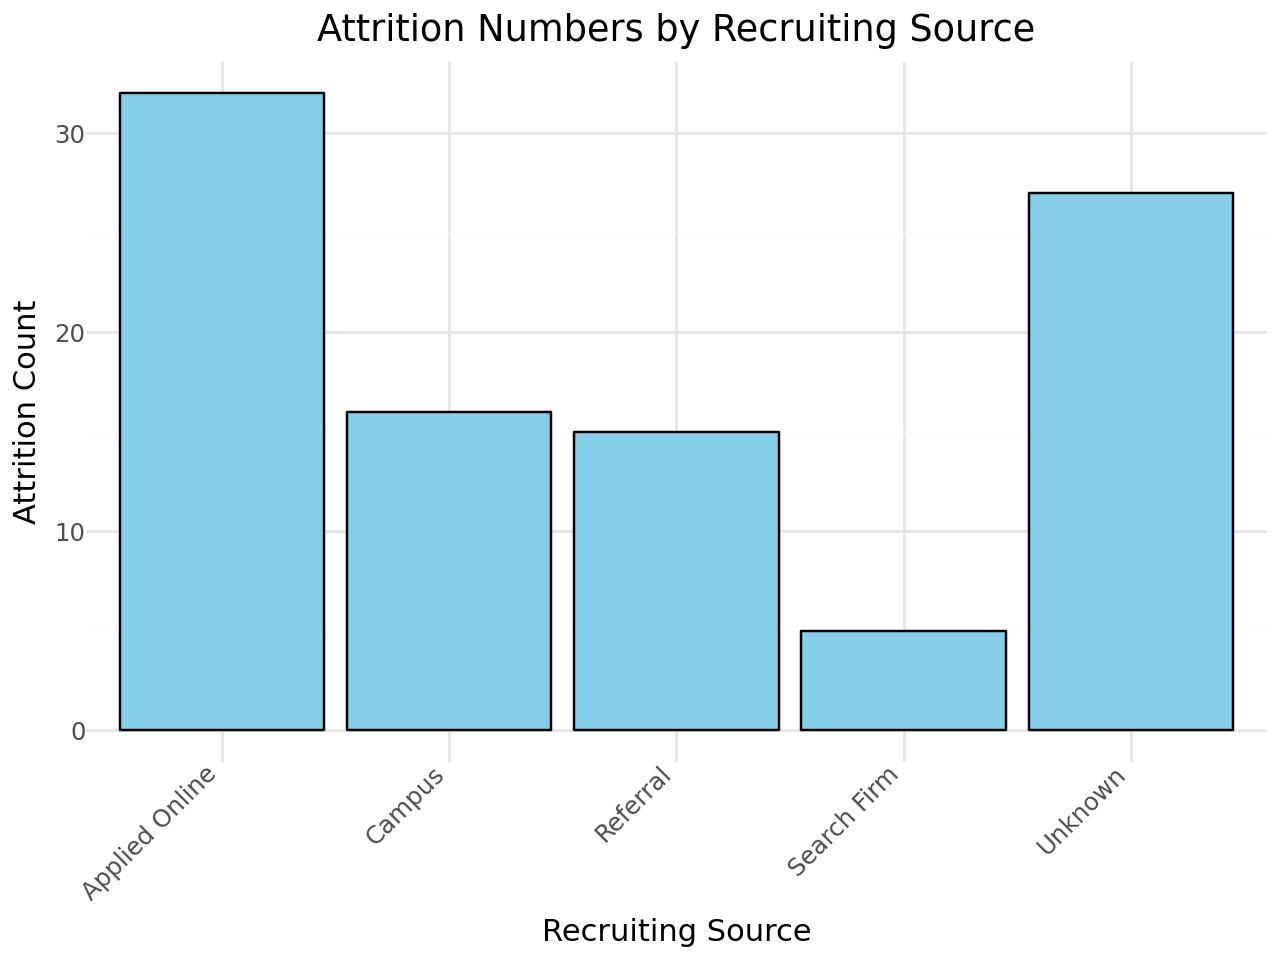

In [30]:
import pandas as pd
from plotnine import *

# Read the CSV file
df = pd.read_csv("Recruitment.csv")

# Handle missing values
df['recruiting_source'].fillna('Unknown', inplace=True)

# Group by Recruiting Source and calculate attrition count
attrition_count = df.groupby('recruiting_source')['attrition'].sum().reset_index()

# Create ggplot chart
chart = (
    ggplot(attrition_count, aes(x='recruiting_source', y='attrition')) +
    geom_bar(stat='identity', fill='skyblue', color='black') +
    labs(x='Recruiting Source', y='Attrition Count', title='Attrition Numbers by Recruiting Source') +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

print(chart)



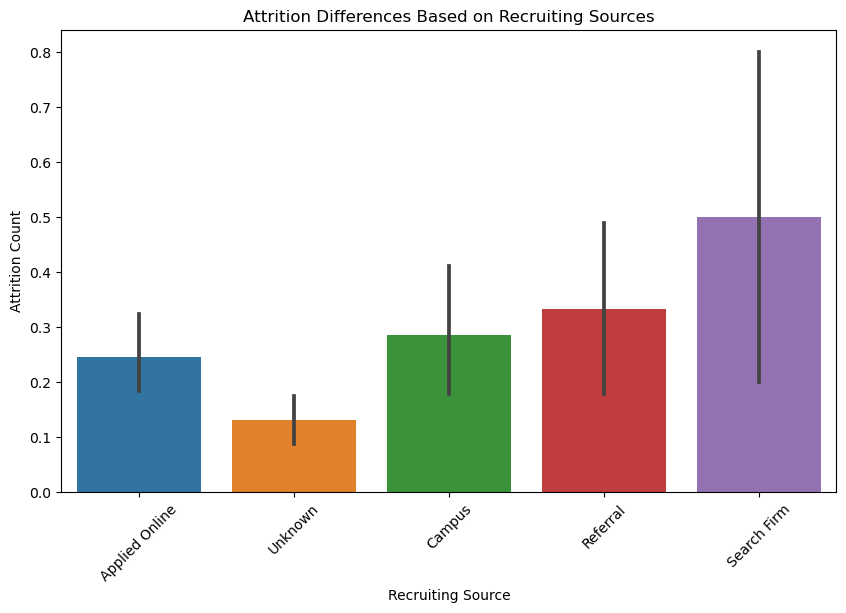

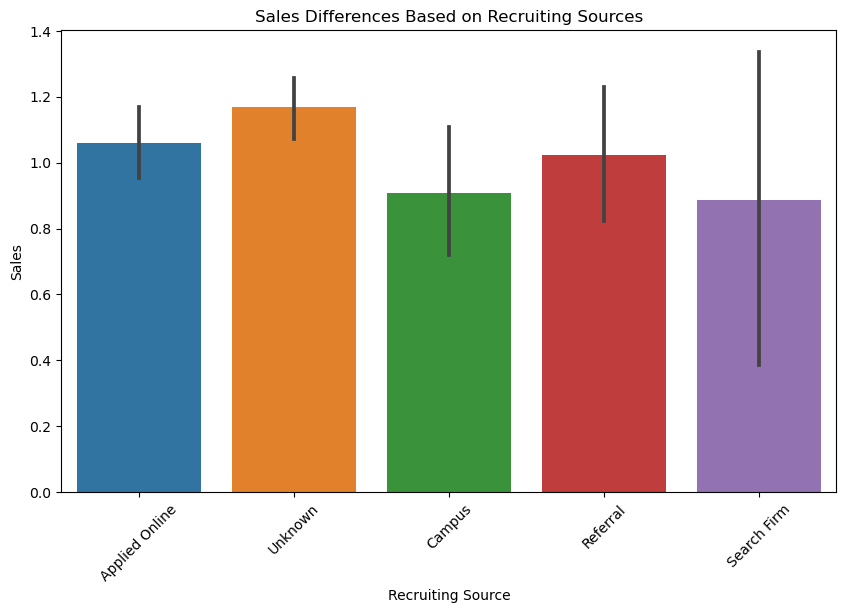

In [32]:

# Visualize attrition differences based on recruiting sources
plt.figure(figsize=(10, 6))
sns.barplot(x='recruiting_source', y='attrition', data=df)
plt.title('Attrition Differences Based on Recruiting Sources')
plt.xlabel('Recruiting Source')
plt.ylabel('Attrition Count')
plt.xticks(rotation=45)
plt.show()

# Visualize sales differences based on recruiting sources
plt.figure(figsize=(10, 6))
sns.barplot(x='recruiting_source', y='sales_quota_pct', data=df)
plt.title('Sales Differences Based on Recruiting Sources')
plt.xlabel('Recruiting Source')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()
